# Computation on Arrays: Broadcasting

## Introducing Broadcasting

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these binary operations to be performed on arrays of different sizes

In [3]:
a + 5

array([5, 6, 7])

In [4]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [7]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [8]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Rules of Broadcasting

* Rule 1: If two arrays differ in their number of dimensions, the shape of the one with fewsr dimensions is padded with ones on its leading (left) side

* Rule 2: If the shape of two arrays does not match in any dimentions, the array with shape equal to 1 in that dimension is scretched to match the other shape

* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised

### Broadcasting example 1

In [11]:
M = np.ones((2, 3))
a = np.arange(3)

* M.shape = (2, 3)
* a.shape = (3,)

Rule 1:
* M.shape -> (2, 3)
* a.shape -> (1, 3)

Rule 2:
* M.shape -> (2, 3)
* a.shape -> (2, 3)

In [13]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

In [14]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [15]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

In [16]:
M = np.ones((3, 2))
a = np.arange(3)

* M.shape -> (3, 2)
* a.shape -> (3, 3)

In [17]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [18]:
a[:, np.newaxis].shape

(3, 1)

In [20]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [21]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

### Centering an array

In [22]:
X = np.random.random((10, 3))

In [23]:
Xmean = X.mean(0)
Xmean

array([0.56090948, 0.4650679 , 0.50065785])

In [28]:
X_centered = X - Xmean

In [29]:
X_centered.mean(0)

array([ 1.22124533e-16, -1.11022302e-17,  9.99200722e-17])

To within machine precision, the mean is now zero

### Plotting a two-dimensional function

defining a function z = f(x, y)


In [31]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y ** x) * np.cos(x)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

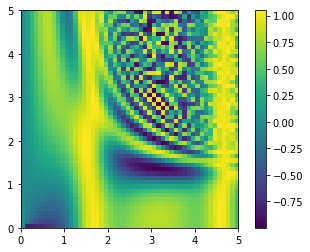

In [34]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();